In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib.patches import ArrowStyle, Rectangle

In [2]:
model_name = ["OPT-1.3B", "Phi-2B", "Llama-2-7B", "Llama-2-13B"]
model_name_dict = {
    "OPT-1.3B": "opt_1_point_3", 
    "Phi-2B": "phi_2",
    "Llama-2-7B": "llama_2_7", 
    "Llama-2-13B": "llama_2_13", 
}

In [3]:
model_config_list = np.zeros((6, len(model_name)))
base_path = './model_value_config'
for idx, name in enumerate(model_name):
    file_path = f'{base_path}/{model_name_dict[name]}.pickle'
    with open(file_path, 'rb') as f:
        model_config = pickle.load(f)
        
    tensor_outlier   = np.mean( list(model_config['tensor_outlier_config'].values())  )
    channel_outlier  = np.mean( list(model_config['channel_outlier_config'].values()) )
    group_outlier    = np.mean( list(model_config['group_outlier_config'].values())   )
    tensor_range     = np.mean( list(model_config['tensor_range_config'].values())    )
    channel_range    = np.mean( list(model_config['channel_range_config'].values())   )
    group_range      = np.mean( list(model_config['group_range_config'].values())     )
    
    model_config_list[0, idx] = tensor_outlier
    model_config_list[1, idx] = channel_outlier
    model_config_list[2, idx] = group_outlier
    model_config_list[3, idx] = tensor_range
    model_config_list[4, idx] = channel_range
    model_config_list[5, idx] = group_range


## Normalized Range and Maximum Value

In [4]:
linestyle   = 'solid'
alpha       = 1
tick_size   = 10
ylabel_size = 10.5
xlabel_size = 9
legend_size = 9.5
title_size  = 10
text_size   = 8

# bar setting
width      = 0.035  # the width of each bar
edgewidth  = 0.8 # the edge width of each bar
hatchwidth = 0.5 # the edge width of each bar
spacing    = 0.14 # spacing between each model bar
distance   = 0.0  # spacing between every two bars of the same model

x          = np.arange(len(model_name))*spacing # the label locations

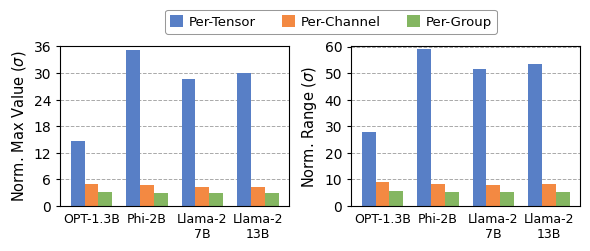

In [5]:
figwidth    = 6
figheight   = 2.3

y_title_pad = 0
title_yloc  = 0.89
rotation = 0
x_margin = 0.08

############# Arrow Style #############
arrowstyle = ArrowStyle.CurveB(head_length=0.4, head_width=0.2, widthA=0.2, widthB=1.0, lengthA=0., lengthB=0., angleA=0, angleB=0, scaleA=None, scaleB=None)
arrowstyle._beginarrow_head = False
arrowstyle._beginarrow_bracket = True
#######################################

f, ax = plt.subplots(1, 2)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f_list = [i for i in range(3)]
color_list = [(58/250, 103/250, 184/250), (236/250, 115/250, 32/250), (108/250, 166/250, 68/250)]
xlabels = ['OPT-1.3B', 'Phi-2B', 'Llama-2\n7B', 'Llama-2\n13B']

arrow_xloc = x + width + distance/2

for i in range(2):
    for j_tmp in range(-1, 2):
        j = j_tmp + 1
        f_list[j] = ax[i].bar(x + j_tmp*width + distance*j_tmp/2, model_config_list[i*3 + j], 
                              width, color='white')
        f_list[j] = ax[i].bar(x + j_tmp*width + distance*j_tmp/2, model_config_list[i*3 + j], 
                              width, color=color_list[j], alpha=0.85)
    
    if i == 0:
        y_low = 0
        y_up  = 36 + 0.1
        y_lim = y_up
        ax[i].set_ylim(y_low, y_lim)
        ax[i].set_yticks(np.arange(y_low, y_up, 6))

        ax[i].set_xticks(x,)
        ax[i].set_xticklabels(xlabels, rotation=rotation)
        ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=3)
        ax[i].tick_params(axis='x', which='major', labelsize=xlabel_size, pad=5, length=0)
        
        ax[i].set_ylabel('Norm. Max Value ' + r'($\sigma$)', fontsize=ylabel_size, labelpad=4)
    if i == 1:
        y_low = 0
        y_up  = 60 + 0.2
        y_lim = y_up 
        ax[i].set_ylim(y_low, y_lim)
        ax[i].set_yticks(np.arange(y_low, y_up, 10))

        ax[i].set_xticks(x,)
        ax[i].set_xticklabels(xlabels, rotation=rotation)
        ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=3)
        ax[i].tick_params(axis='x', which='major', labelsize=xlabel_size, pad=5, length=0)
        
        ax[i].set_ylabel('Norm. Range ' + r'($\sigma$)', fontsize=ylabel_size, labelpad=4)
    
    ax[i].set_axisbelow(True)
    ax[i].grid(True, linestyle='dashed', axis='y', zorder=1000, color='darkgrey', linewidth=0.7)

leg = f.legend(f_list, ["Per-Tensor", "Per-Channel", "Per-Group"], 
        loc='upper center', bbox_to_anchor=[0.56, 1.1], 
        fontsize=legend_size, ncol=3, columnspacing=2, frameon=True, edgecolor='grey', handlelength=1, handleheight=1, handletextpad=0.4)
leg.get_frame().set_linewidth(0.75)

plt.tight_layout(h_pad=0, w_pad=0.8)
f.savefig('quant_granularity.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)


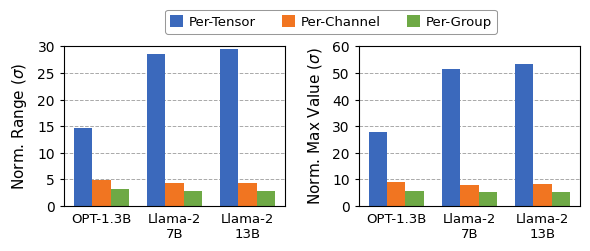

In [33]:
figwidth    = 6
figheight   = 2.3

y_title_pad = 0
title_yloc  = 0.89
rotation = 0
x_margin = 0.08

############# Arrow Style #############
arrowstyle = ArrowStyle.CurveB(head_length=0.4, head_width=0.2, widthA=0.2, widthB=1.0, lengthA=0., lengthB=0., angleA=0, angleB=0, scaleA=None, scaleB=None)
arrowstyle._beginarrow_head = False
arrowstyle._beginarrow_bracket = True
#######################################

f, ax = plt.subplots(1, 2)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f_list = [i for i in range(3)]
color_list = [(58/250, 103/250, 184/250), (236/250, 115/250, 32/250), (108/250, 166/250, 68/250)]
xlabels = ['OPT-1.3B', 'Llama-2\n7B', 'Llama-2\n13B']

arrow_xloc = x + width + distance/2

for i in range(2):
    for j_tmp in range(-1, 2):
        j = j_tmp + 1
        f_list[j] = ax[i].bar(x + j_tmp*width + distance*j_tmp/2, model_config_list[i*3 + j], width, color=color_list[j],)
    
    if i == 0:
        y_low = 0
        y_up  = 30 + 0.1
        y_lim = y_up
        ax[i].set_ylim(y_low, y_lim)
        ax[i].set_yticks(np.arange(y_low, y_up, 5))

        ax[i].set_xticks(x,)
        ax[i].set_xticklabels(xlabels, rotation=rotation)
        ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=3)
        ax[i].tick_params(axis='x', which='major', labelsize=tick_size-0.5, pad=5, length=0)
        
        ax[i].set_ylabel('Norm. Range ' + r'($\sigma$)', fontsize=label_size, labelpad=6)
    if i == 1:
        y_low = 0
        y_up  = 60 + 0.2
        y_lim = y_up 
        ax[i].set_ylim(y_low, y_lim)
        ax[i].set_yticks(np.arange(y_low, y_up, 10))

        ax[i].set_xticks(x,)
        ax[i].set_xticklabels(xlabels, rotation=rotation)
        ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=3)
        ax[i].tick_params(axis='x', which='major', labelsize=tick_size-0.5, pad=5, length=0)
        
        ax[i].set_ylabel('Norm. Max Value ' + r'($\sigma$)', fontsize=label_size, labelpad=6)
    
    ax[i].set_axisbelow(True)
    ax[i].grid(True, linestyle='dashed', axis='y', zorder=1000, color='darkgrey', linewidth=0.7)

leg = f.legend(f_list, ["Per-Tensor", "Per-Channel", "Per-Group"], 
        loc='upper center', bbox_to_anchor=[0.56, 1.1], 
        fontsize=legend_size, ncol=3, columnspacing=2, frameon=True, edgecolor='grey', handlelength=1, handleheight=1, handletextpad=0.4)
leg.get_frame().set_linewidth(0.75)

plt.tight_layout(h_pad=0, w_pad=1.5)
f.savefig('quant_granularity.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)
